# Neural Network for Handwritten Digit Recognition, Multiclass

We will use a neural network to recognize the hand-written digits 0-9.

- The data set contains 60000 training examples and 10000 testing examples of handwritten digits.  

    - Each training example is a 28-pixel x 28-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 28 by 28 grid of pixels is “unrolled” into a 784-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 60000 x 784 matrix `X` where every row is a training example of a handwritten digit image.

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(3)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, InputLayer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt('mnist_train.csv', delimiter=",")
test_data = np.loadtxt('mnist_test.csv', delimiter=",")
X_train = train_data[:, 1:]
y_train = train_data[:, :1].astype(int) # As int to be used later in the visualization
X_test = test_data[:, 1:]
y_test = test_data[:, :1].astype(int)

In [3]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]])

Size of the dataset

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

In [6]:
X_train[0] # The first element of X_train

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
y_train[0,0] # The first element of y_train

5

We will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 81 rows from `X_train`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

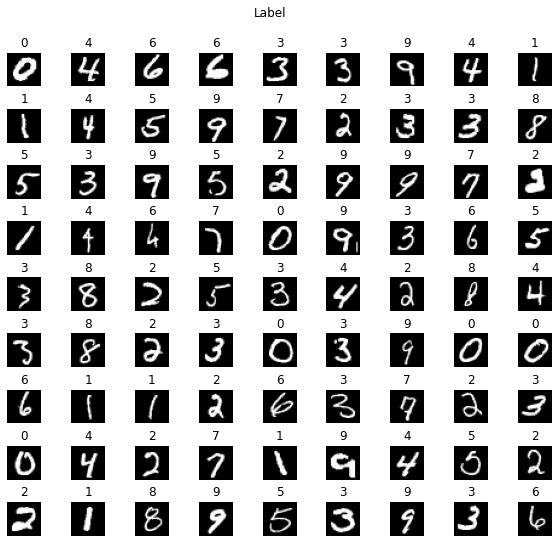

In [8]:
m, n = X_train.shape

fig, axes = plt.subplots(9, 9, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape(28,28)

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f'{int(y_train[random_index,0])}')
    ax.set_axis_off()

fig.suptitle('Label');

First normalize the data for a faster learning.

In [9]:
norm = Normalization()
norm.adapt(X_train) # Learning mean and variance 
Xn_train = norm(X_train).numpy() # converting to numpy array
Xn_test = norm(X_test).numpy()
# (X - mean) / sqrt(var)

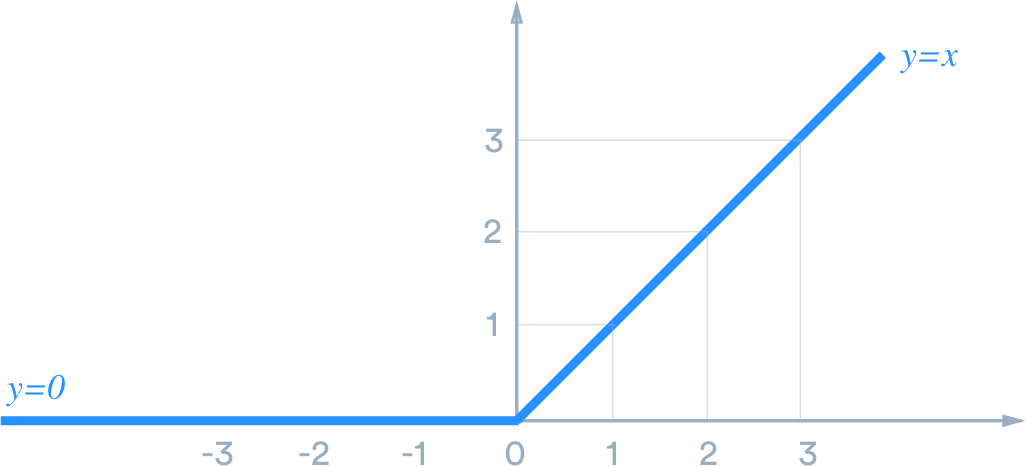

Softmax function.

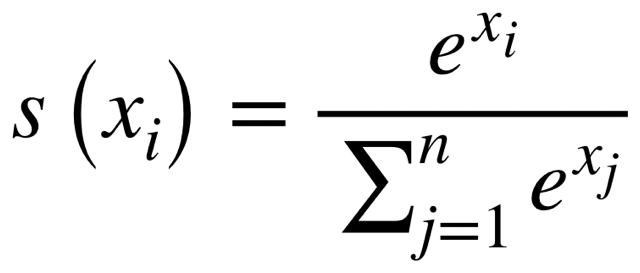

### Building the neural network.

The parameters have dimensions that are sized for a neural network with 180  units in layer 1 and 10  output units in layer 2, one for each digit.

The following code:
* defines a loss function, `SparseCategoricalCrossentropy` (should be included with the  loss calculation by adding `from_logits=True` to convert the linear activation function in the output layer to softmax).
* defines an optimizer. A popular choice is Adaptive Moment (Adam).

In [10]:
#model = Sequential(
#    [
#        InputLayer((784,)),
#        Dense(180, 'relu'),
#        Dense(10, 'softmax') 
#    ]
#)

#model.compile(
#    loss=SparseCategoricalCrossentropy(),
#    optimizer=Adam(learning_rate=0.0002), 
#)

model = Sequential(
    [
        InputLayer((784,)),
        Dense(180, 'relu'),
        Dense(10, 'linear') 
    ]
)

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.0002), # default learning_rate is 0.001
)

# For the accuracy of the last layer outputs use linear instead of softmax
# and the class SparseCategoricalCrossentropy will have an arg from_logits=True
# This will make the loss more accurate (less numerical roundoff errors)

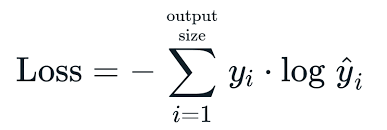

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               141300    
                                                                 
 dense_1 (Dense)             (None, 10)                1810      
                                                                 
Total params: 143,110
Trainable params: 143,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stop = EarlyStopping(patience=3, monitor='loss') # it prevents overfitting

model.fit(
    Xn_train, y_train,
    epochs=200,
    callbacks=[early_stop]
)

Epoch 1/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3324
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1440
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0992
Epoch 4/200
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0735
Epoch 5/200
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0555
Epoch 6/200
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434
Epoch 7/200
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0341
Epoch 8/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0263
Epoch 9/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0208
Epoch 10/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0163
Epoch 11/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127
Epoch 12/200
1875/1875 [==============================] - 6s 3ms/step 

Let's compare the predictions vs the labels for a random sample of 100 digits in the test data.

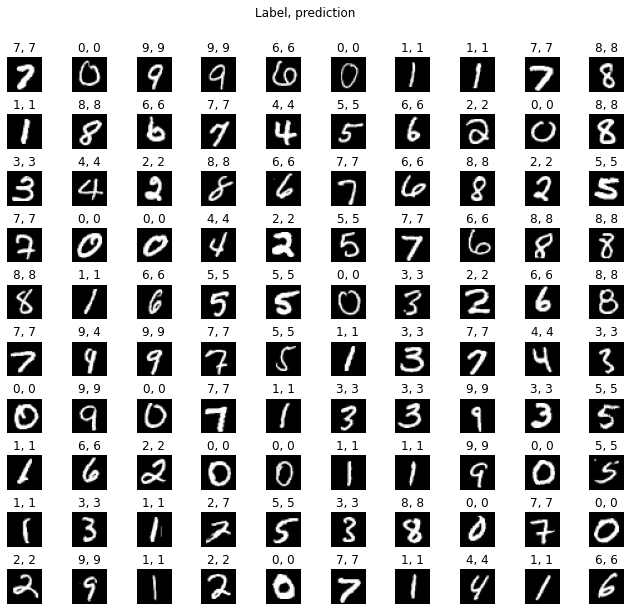

In [13]:
m, n = X_test.shape

fig, axes = plt.subplots(10, 10, figsize=(9,9))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X_test[random_index].reshape(28,28)

    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using our neural network
    pred = model.predict(Xn_test[random_index].reshape(1,784), verbose=None)
    yhat = np.argmax(pred)

    ax.set_title(f'{y_test[random_index,0]}, {yhat}')
    ax.set_axis_off()
fig.suptitle('Label, prediction');

Let's check the number of errors.

In [14]:
def display_number_of_errors(model, X, y):
    f = model.predict(X, verbose=None)
    yhat = np.argmax(f, axis=1) # Finds the highest value in each subarray 
    idxs = np.where(yhat != y[:,0])[0]
    return len(idxs)

In [15]:
print(f'{display_number_of_errors(model, Xn_test, y_test)} errors out of {len(X_test)} images')

233 errors out of 10000 images


Let's calculate the accuracy.

In [16]:
def display_accuracy(model,X,y):
    n_errors = display_number_of_errors(model,X,y)
    acc = (len(X) - n_errors) / len(X)
    return acc

In [17]:
print(f'The accuracy of the model = {display_accuracy(model, Xn_test, y_test)}')

The accuracy of the model = 0.9767


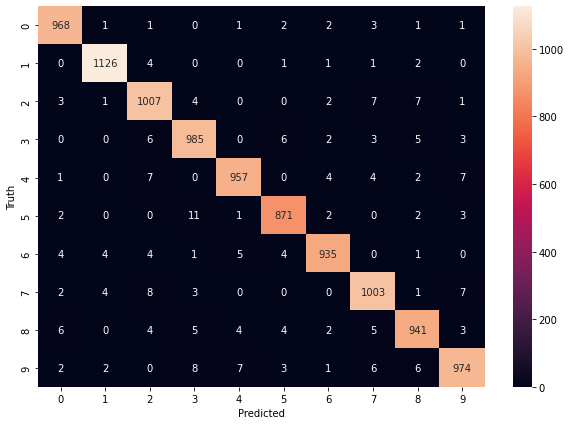

In [23]:
y_pred = model.predict(Xn_test, verbose=False)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');